In [175]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [177]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames

We do not have a sperate test dataset. So we will use the cross-validaiton score. 

Confidence interval ? or statistical comments?

ill it be a ensemble classifier like Gradient Boosting or Random Forest, or a classifier which uses a functional approach like Logistic Regression, a classifier which uses a statistical approach like Naive Bayes etc.?

In [ ]:
Can try SmOTE Even !!


# Data Preprocessing

In [178]:
import pandas as pd

# Read in track metadata with genre labels
tracks = pd.read_csv('datasets/fma-rock-vs-hiphop.csv')

# Read in track metrics with the features
echonest_metrics = pd.read_json('datasets/echonest-metrics.json', precise_float=True)

In [179]:
tracks.head(2)

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]",...,NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]",...,NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky


In [180]:
echonest_metrics.head(1)

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.15931,165.922,0.576661


tracks table contains the genre label w.r.t the track id and  echonest_metrics table contains all the features w.r.t to the track id. Lets merge both to get our final data set. 

In [181]:
# Merge the relevant columns of tracks and echonest_metrics
echo_tracks = pd.merge(left=echonest_metrics, right=tracks[['track_id', 'genre_top']], on='track_id')

# Inspect the resultant dataframe
echo_tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4801
Data columns (total 10 columns):
track_id            4802 non-null int64
acousticness        4802 non-null float64
danceability        4802 non-null float64
energy              4802 non-null float64
instrumentalness    4802 non-null float64
liveness            4802 non-null float64
speechiness         4802 non-null float64
tempo               4802 non-null float64
valence             4802 non-null float64
genre_top           4802 non-null object
dtypes: float64(8), int64(1), object(1)
memory usage: 412.7+ KB


There are no missing values in the data set and all features are numeric.

## Distribution of Classes

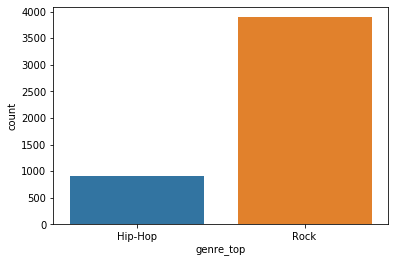

In [67]:
sns.countplot(echo_tracks['genre_top'])

In [63]:
echo_tracks.genre_top.value_counts()

Rock       3892
Hip-Hop     910
Name: genre_top, dtype: int64

In [64]:
echo_tracks.genre_top.value_counts(normalize=True).mul(100)

Rock       81.049563
Hip-Hop    18.950437
Name: genre_top, dtype: float64

This is a case of Imbalanced classes as the minority class is only 19% of the dataset. 
If a classifier predicts all classes as Rock, it will still have 81% accuracy. Thus a meaningful classifier should perform much better than that. 

## Correlation Heat map

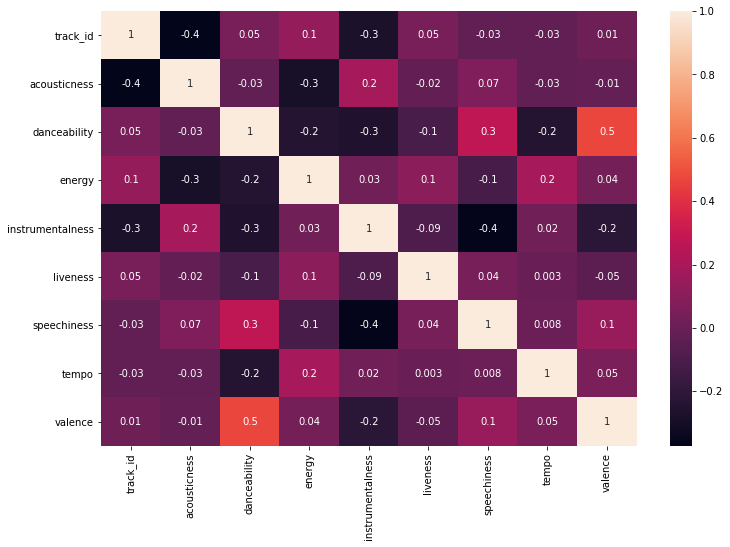

In [47]:
plt.figure(figsize=(12,8))
sns.heatmap(echo_tracks.corr(), annot = True, fmt='.1g')

They are no strongly correlated features here. 

## Checking on Outliers

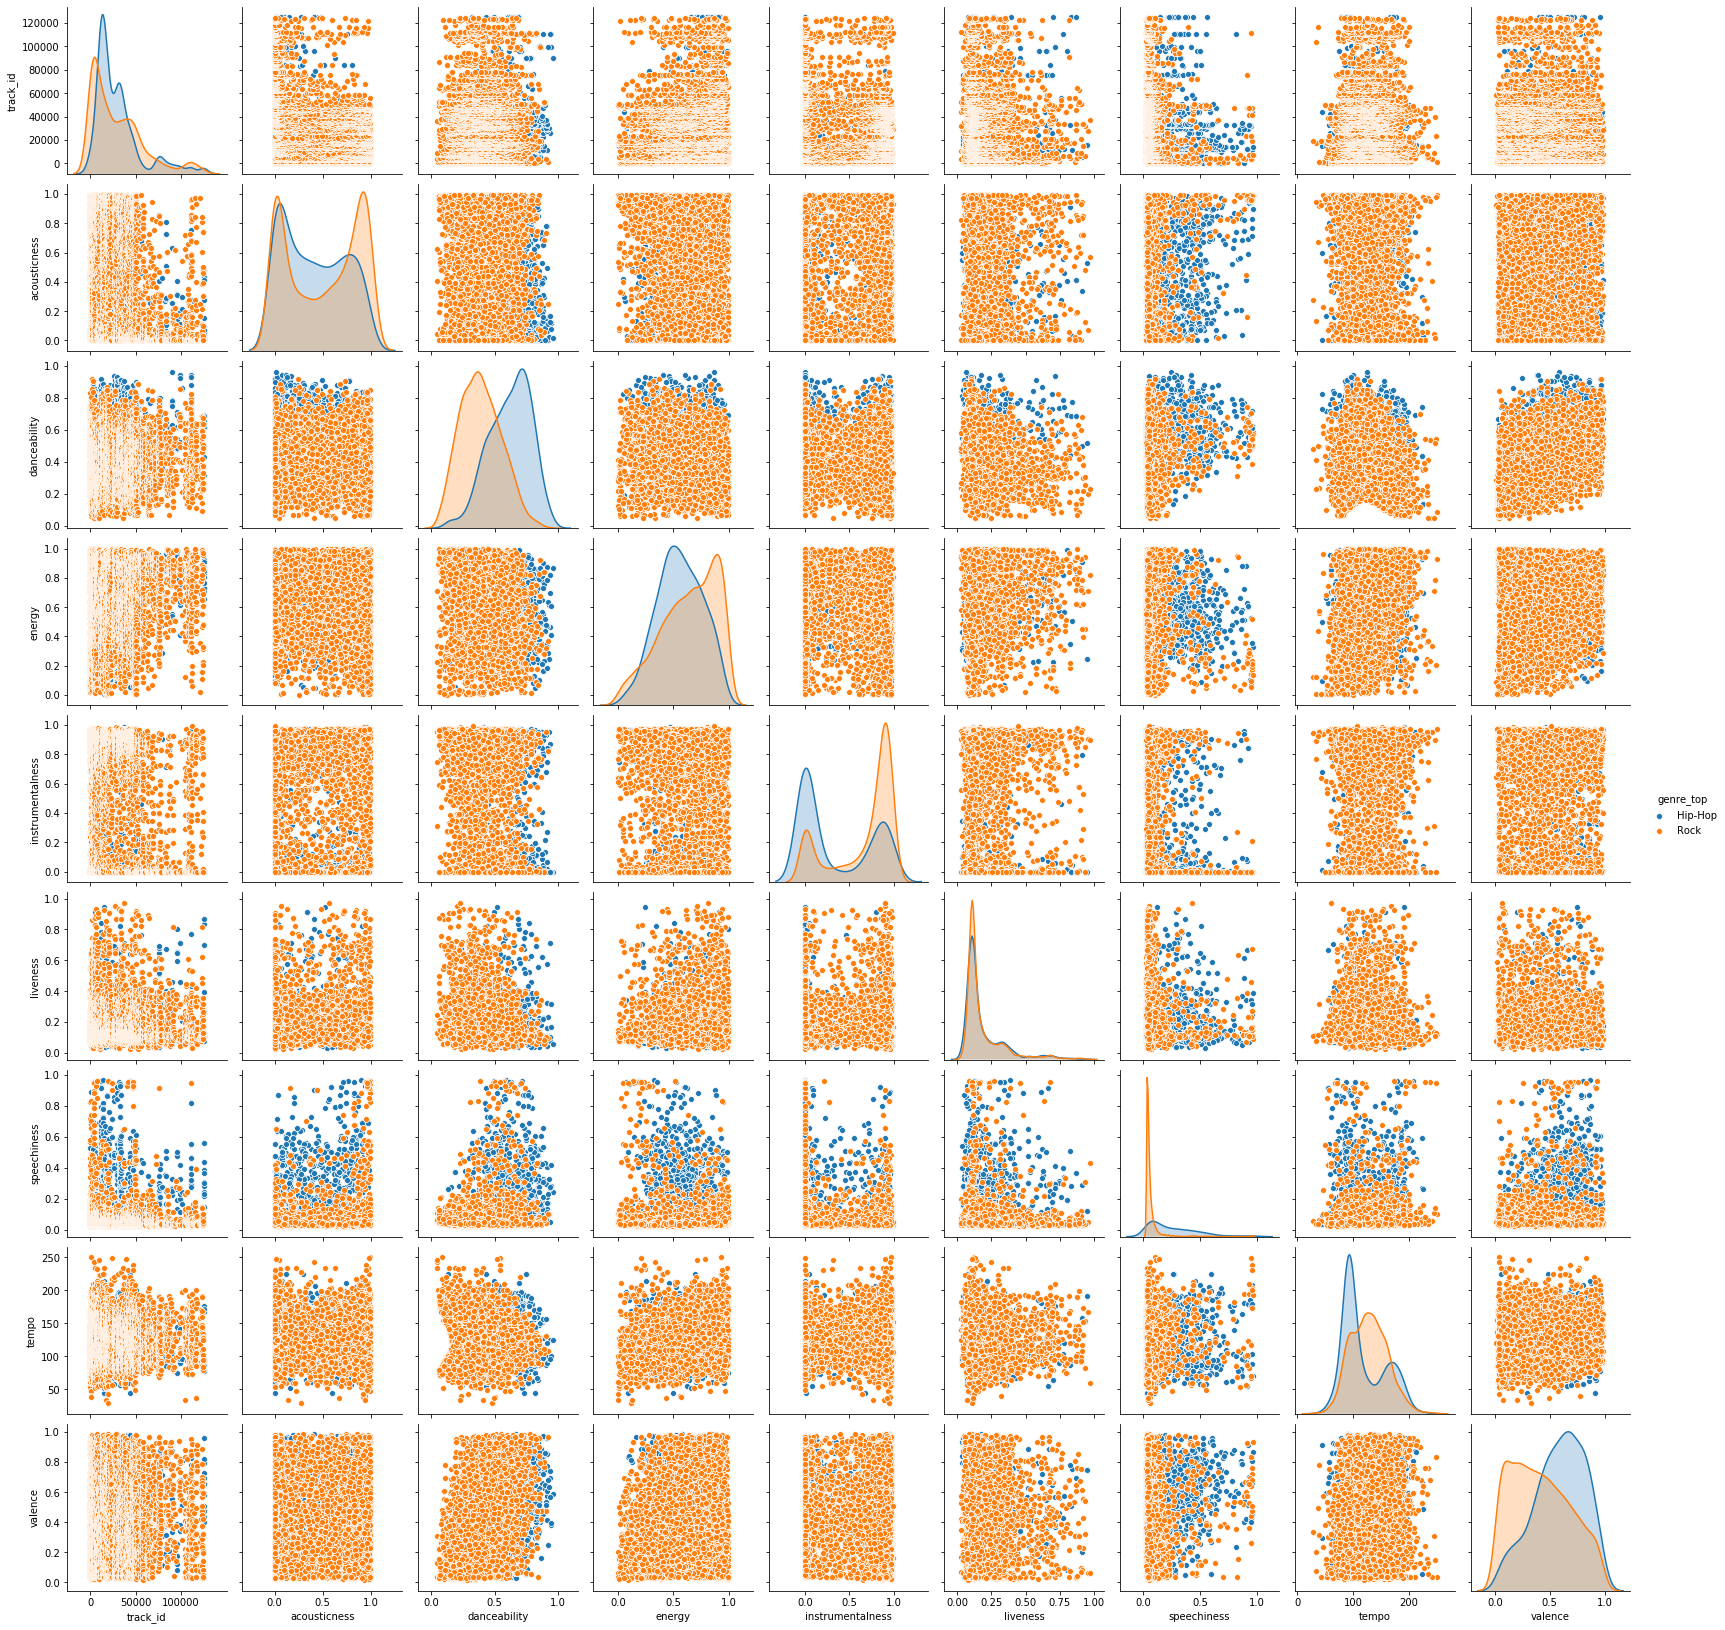

In [50]:
sns.pairplot(echo_tracks, hue = 'genre_top')

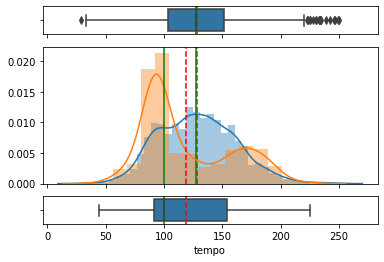

In [114]:
GroupBoxDistPlot('tempo')

Goal
- identify most distinctive features
- checks for any extreme outliers

In [ ]:
Can us customize the sizes and then try for subplots!

In [124]:
echo_tracks.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top,label
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,Hip-Hop,1.0
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,Hip-Hop,1.0
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,Hip-Hop,1.0
3,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,Hip-Hop,1.0
4,153,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018,Rock,0.0


In [61]:
make subplots, two in one row with proper labels!

Series([], Name: tempo, dtype: float64)

# Scaling Data

In [202]:
from sklearn.preprocessing import StandardScaler
Is it required?


Object `required` not found.


In [ ]:
Is it required

# Deciding the Evaluation Metric

In [30]:
a = pd.DataFrame(echo_tracks.groupby('genre_top').describe())
a

track_id                                                        \
             count          mean           std    min       25%      50%   
genre_top                                                                  
Hip-Hop      910.0  30438.267033  25436.855183    2.0  12555.75  22023.5   
Rock        3892.0  30100.948356  29283.378054  153.0   4781.75  20715.5   

                              acousticness            ...      tempo           \
                75%       max        count      mean  ...        75%      max   
genre_top                                             ...                       
Hip-Hop    36901.00  124722.0        910.0  0.412649  ...  153.96300  224.955   
Rock       46090.25  124186.0       3892.0  0.504458  ...  151.17325  250.059   

          valence                                                              \
            count      mean       std       min       25%       50%       75%   
genre_top                                                                       
Hip-Hop     910.0  0.589433  0.228994  0.031204  0.438432  0.612369  0.773514   
Rock       3892.0  0.421610  0.264821  0.014392  0.196822  0.396441  0.623572   

                     
                max  
genre_top            
Hip-Hop    0.983199  
Rock       0.983649  

[2 rows x 72 columns]

In [ ]:
def evaluate_model():
    training | Cross - Validation score

In [271]:
echo_tracks.loc[echo_tracks['genre_top'] == 'Hip-Hop', 'label'] = 1
echo_tracks.loc[echo_tracks['genre_top'] != 'Hip-Hop', 'label'] = 0

y = echo_tracks['label']

In [272]:
X = echo_tracks.drop(columns = ['genre_top', 'label', 'track_id'])

In [96]:
# Training Models

# Define our features 
features = echo_tracks.drop(['genre_top', 'track_id'], axis=1)

# Define our labels
labels = echo_tracks['genre_top']

In [99]:
features.shape
# labels.shape
# splitting Data

(4802, 9)

Fixing Stratificationb

In [273]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score 

cv = KFold(n_splits=3)
scv = StratifiedKFold(n_splits=3)
clf = GaussianNB()

metric_names = ['f1', 'roc_auc', 'average_precision', 'accuracy', 'precision', 'recall']
scores_df = pd.DataFrame(index=metric_names, columns=['Random-CV', 'Stratified-CV']) # to store the scores
for metric in metric_names:
    score1 = cross_val_score(clf, X, y, scoring=metric, cv=cv).mean()
    score2 = cross_val_score(clf, X, y, scoring=metric, cv=scv).mean()
    scores_df.loc[metric] = [score1, score2]
    
    
# For getting std / confidence interval (assuming its normally distributed)    

In [274]:
scores_df

,Random-CV,Stratified-CV
f1,0.633862,0.67295
roc_auc,0.892317,0.899704
average_precision,0.623586,0.66623
accuracy,0.871507,0.877127
precision,0.659246,0.697068
recall,0.633771,0.658275


# Training Classifiers

We will be using cross-validation scores of accuracy and f1-score for comparing our classifiers. 

Categorize your classifiers
- predict proabability


Levers 
- changing threshold
- ensemble
- under n over sampling
- 

Deiding on the train and test split ?

- normal CV
- or stratified sampling
- or under/over sampling
- data generation

Define your approach ! 
- Training and comparing different classifiers with default settings, we will then choose the top ones to further tune their hyperparameters. 

In [185]:
from sklearn.model_selection import train_test_split

X_train, X_test,  y_train, y_test = train_test_split(x, y)

## Basic classifiers

In [107]:
l = LogisticRegression()
l.fit(X_train, y_train)
# train_predictions = l.predict(X_test)
# acc = accuracy_score(y_test, train_predictions)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [101]:
print(X_train.shape)
print(y_train.shape)

(3217, 9)
(1585, 9)


In [204]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
import time

In [205]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "f1_score", "Precission-recall AUC", "time_to_train"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    
    t_start = time.clock()
    clf.fit(X_train, y_train)
    t_end = time.clock()
    t_diff = t_end - t_start
    
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    test_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, test_pred)
    print("Accuracy: {:.4%}".format(acc))
    
    f1_score = accuracy_score(y_test, test_pred)
    print("f1_score: {:.4%}".format(f1_score))
    
    test_probab = clf.predict_proba(X_test)[:, 1] # Keeping proabab only for the positive outcome
    precision, recall, _ = precision_recall_curve(y_test, test_probab)
    pr_re_auc = auc(recall, precision)
    print("Precission_Recall_AUC: {}".format(pr_re_auc))
    
    log_entry = pd.DataFrame([[name, acc*100, f1_score, pr_re_auc, t_diff]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30) 

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:30: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/usr/local/lib/python3.7/site-package

LogisticRegression
****Results****
Accuracy: 89.2590%
f1_score: 89.2590%
Precission_Recall_AUC: 0.7219069442789076
KNeighborsClassifier
****Results****
Accuracy: 86.8443%
f1_score: 86.8443%
Precission_Recall_AUC: 0.6441044010955281


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:30: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:30: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


SVC
****Results****
Accuracy: 81.5987%
f1_score: 81.5987%
Precission_Recall_AUC: 0.5871674575872345
DecisionTreeClassifier
****Results****
Accuracy: 86.6778%
f1_score: 86.6778%
Precission_Recall_AUC: 0.6713146284581852


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:30: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


RandomForestClassifier
****Results****
Accuracy: 90.9242%
f1_score: 90.9242%
Precission_Recall_AUC: 0.844434273077151


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:30: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


AdaBoostClassifier
****Results****
Accuracy: 90.8410%
f1_score: 90.8410%
Precission_Recall_AUC: 0.8225757056136862
GradientBoostingClassifier
****Results****
Accuracy: 91.5071%
f1_score: 91.5071%
Precission_Recall_AUC: 0.8413661261660649
GaussianNB
****Results****
Accuracy: 88.0100%
f1_score: 88.0100%
Precission_Recall_AUC: 0.6765443412339693
LinearDiscriminantAnalysis
****Results****
Accuracy: 88.8426%
f1_score: 88.8426%
Precission_Recall_AUC: 0.7180616531348794
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 89.4255%
f1_score: 89.4255%
Precission_Recall_AUC: 0.7104196321404327


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:30: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:30: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:30: DeprecationWarning: time.clock has been deprecated in Python 3.

In [196]:
y_test.shape
test_probab.shape

(1201,)

In [ ]:
Chooe the right form of cross validation score. 
Why you chose the metric link. 

In [280]:
log

,Classifier,Accuracy,f1_score,Precission-recall AUC,time_to_train
0,LogisticRegression,89.258951,0.892590,0.721907,0.239017
0,KNeighborsClassifier,86.844296,0.868443,0.644104,0.020938
0,SVC,81.598668,0.815987,0.587167,0.827023
0,DecisionTreeClassifier,86.677769,0.866778,0.671315,0.024164
0,RandomForestClassifier,90.924230,0.909242,0.844434,0.592123
0,AdaBoostClassifier,90.840966,0.908410,0.822576,0.280862
0,GradientBoostingClassifier,91.507077,0.915071,0.841366,0.716726
0,GaussianNB,88.009992,0.880100,0.676544,0.002423
0,LinearDiscriminantAnalysis,88.842631,0.888426,0.718062,0.004322
0,QuadraticDiscriminantAnalysis,89.425479,0.894255,0.710420,0.012214


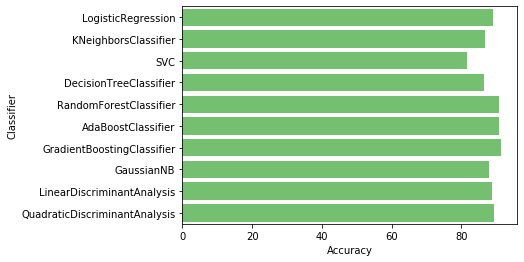

In [217]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="g")

# XGboost

In [218]:
from xgboost import XGBClassifier

In [219]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [223]:
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
accuracy

0.9142381348875936

# Hypere parameter optimisation

In [277]:
Cross validation and training accuracy?

# SMOTE

In [ ]:
# Making Custome Ensemble

In [282]:
# PCA followed by classification algorithms. 

Consider this as imbalanced and try whatever you want to here only !! 
SMOTE and ensemble per say but finish part 1 with Tuning

[For part 2](https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets)



Extend this notebook to Glass data set with Multiple class
[Glass](https://machinelearningmastery.com/standard-machine-learning-datasets-for-imbalanced-classification/)

In [ ]:
Random Forest
Gradient Boost
XGBoosy
CataBoost
AdaBoost


Categorize them into Ensemble: Bagging etc. 

In [31]:
# Logistic regression



In [213]:
pip3 install xgboost

SyntaxError: invalid syntax (<ipython-input-213-3debf2381671>, line 1)

In [32]:
# Decision tree

In [33]:
# Naive Bayes

In [34]:
# Linear SVM

In [35]:
# Poly SVM

In [ ]:
# Ensemble

In [ ]:
# Random Forest

In [ ]:
# Basic Neural Network

In [36]:
# Bagging

In [37]:
# Adaboost

In [38]:
# Catboost

In [39]:
# Xgboost

# Hyperparameter Tuning

# Manual Ensemble

# What more Can be done

 1. Explore feature selection, PCA methods to see if that reduces overfitting and improves the cross validation score. 
 2. Explore methods to deal with Imbalanced dataset - Undersampling, oversampling, ensemble. 
 Link

# QnA

**1. How can we draw an ROC curve for SVM and KNN when the algoirthm do not output the class proability?**

Yes they do not output class probabilities directly, but a proxy metric is used. In SVMs it's the distance to the margin. In K-NNs it's the neighborhood voting proportions. 

[stack overflow](https://stats.stackexchange.com/questions/450721/is-there-any-classification-algorithm-that-doesnt-give-probability)

**2. Why does balancing classes in the dataset important? How does it impact the classifier ? Are some algorithms robust to it?**

Generally cost function of the algorithms give equal weightage to all the classes. If that is the case then the classifier tends to be more inclined towards the majority class as that improves its overall cost. Thus we are unable to distinguish between the classes. 

Yes some algorithms are robust to it: 
Example xgboost, randomforest 

**3. What should be the objective function in case of imbalanced dataset?**

**4. What's the way to deal with the imbalanced dataset to improve the required metric, stated above?**

**5. If we increase weights for minority class in the cost function, which metric does it effect with certainity?**

My hypothesis:\
Recall (ability to detect the minority class) should improve certainly. Accuracy can be anything as its a summation of all data points.\
Precision (accuracy of detecting minority class) not sure (either decrease or can be any)

**4. ssdf**